In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
def cal_mean_sem(v):
    _v = np.stack(v)
    #print(_v.shape)
    m = np.mean(_v, axis=0)
    ci = 1.96*np.std(_v, axis=0)/ np.sqrt(_v.shape[0])
    
    return ", ".join(["%.3f±%.4f" % (a,b) for a,b in zip(m, ci)])

In [3]:
data1 = pd.read_pickle('G_ripple_data1.pkl') ## winner and their control group

In [4]:
data1.shape

(466368, 8)

In [5]:
data1.head(2)

,matched_group,type,publication_year,concept,teamsize,treated_year,treated_paper,yearlymat
1520250,1,journal-article,1967,Physics,3,NaN,False,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1]"
1520268,1,journal-article,1967,Physics,3,1978.0,True,"[1, 1, 1, 1, 0, 1, 0, 0, 2, 0]"


In [6]:
treated_cit  = data1[(data1.treated_paper==True)] #winner
print("treated paper±95%CI: ", cal_mean_sem(treated_cit.yearlymat.values))

treated paper±95%CI:  0.773±0.0164, 0.836±0.0166, 0.949±0.0175, 1.102±0.0185, 1.323±0.0195, 1.620±0.0229, 1.684±0.0266, 1.650±0.0291, 1.610±0.0301, 1.550±0.0291


In [7]:
matched_cit  = data1[(data1.treated_paper==False)]
print ("matched paper±95%CI:", cal_mean_sem(matched_cit.yearlymat.values))

matched paper±95%CI: 0.765±0.0161, 0.831±0.0168, 0.944±0.0176, 1.097±0.0185, 1.320±0.0198, 1.400±0.0212, 1.401±0.0218, 1.355±0.0221, 1.316±0.0232, 1.263±0.0235


In [3]:
time_to_prize = np.arange(-5, 5)
treated_effect = [0.773, 0.836, 0.949, 1.102, 1.323, 1.620, 1.684, 1.650, 1.610, 1.550]
matched_effect = [0.765, 0.831, 0.944, 1.097, 1.320, 1.400, 1.401, 1.355, 1.316, 1.263]
treated_ci = [0.0164, 0.0166, 0.0175, 0.0185, 0.0195, 0.0229, 0.0266, 0.0291, 0.0301, 0.0291]
matched_ci = [0.0161, 0.0168, 0.0176, 0.0185, 0.0198, 0.0212, 0.0218, 0.0221, 0.0232, 0.0235]

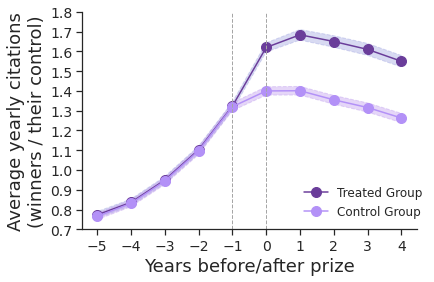

In [4]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
plt.plot(time_to_prize, treated_effect, '-o', label='Treated Group', color='#6A3D9A', markersize=10) #绘制treated_effect的曲线
plt.plot(time_to_prize, matched_effect, '-o', label='Control Group', color='#B391F7', markersize=10)
plt.fill_between(time_to_prize, np.array(treated_effect) - np.array(treated_ci), np.array(treated_effect) + np.array(treated_ci), alpha=0.4, color='#9EA3E0',linestyle='dashed')
plt.fill_between(time_to_prize, np.array(matched_effect) - np.array(matched_ci), np.array(matched_effect) + np.array(matched_ci), alpha=0.4, color='#BE9AEE',linestyle='dashed')
plt.axvline(x=0, linestyle='--', color='#A6A6A6', linewidth=1)
plt.axvline(x=-1, linestyle='--', color='#A6A6A6', linewidth=1)
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0),fontsize=12,frameon=False)
plt.xlabel('Years before/after prize',fontsize=18)
plt.ylabel(r'Average yearly citations' + '\n' +
           r'(winners / their control)', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(-5, 5, 1),fontsize=14)
plt.yticks(np.arange(0.7, 1.9, 0.1),fontsize=14)
plt.show()

In [10]:
data2 = pd.read_pickle('G_ripple_data2.pkl') ## coauthor and their control group

In [11]:
data2.shape

(6854318, 8)

In [20]:
data2.head(2)

,matched_group,type,publication_year,concept,teamsize,treated_year,treated_paper,yearlymat
71375336,1,journal-article,2011,Medicine,3,NaN,False,"[7, 1, 0, 1, 0, 0, 0, 0, 0, 0]"
71375356,1,journal-article,2011,Medicine,3,2017.0,True,"[7, 1, 0, 1, 0, 3, 0, 1, 0, 0]"


In [12]:
treated_cit  = data2[(data2.treated_paper==True)] 
print("treated paper±95%CI: ", cal_mean_sem(treated_cit.yearlymat.values))

treated paper±95%CI:  0.737±0.0029, 0.916±0.0032, 1.155±0.0036, 1.465±0.0040, 1.856±0.0045, 2.262±0.0053, 2.300±0.0058, 2.235±0.0062, 2.167±0.0065, 2.077±0.0069


In [13]:
matched_cit  = data2[(data2.treated_paper==False)]
print ("matched paper±95%CI:", cal_mean_sem(matched_cit.yearlymat.values))

matched paper±95%CI: 0.733±0.0029, 0.913±0.0032, 1.152±0.0036, 1.463±0.0041, 1.856±0.0045, 2.089±0.0052, 2.091±0.0055, 2.031±0.0057, 1.965±0.0060, 1.886±0.0062


In [5]:
time_to_prize = np.arange(-5, 5)
treated_effect = [0.737, 0.916, 1.155, 1.465, 1.856, 2.262, 2.300, 2.235, 2.167, 2.077]
matched_effect = [0.733, 0.913, 1.152, 1.463, 1.856, 2.089, 2.091, 2.031, 1.965, 1.886]
treated_ci = [0.0029, 0.0032, 0.0036, 0.0040, 0.0045, 0.0053, 0.0058, 0.0062, 0.0065, 0.0069]
matched_ci = [0.0029, 0.0032, 0.0036, 0.0041, 0.0045, 0.0052, 0.0055, 0.0057, 0.0060, 0.0062]

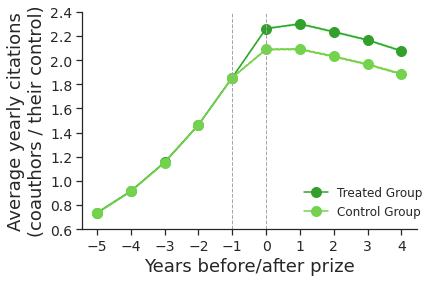

In [6]:
sns.set(font_scale=1.5)
sns.set(style="ticks")
plt.plot(time_to_prize, treated_effect, '-o', label='Treated Group', color='#33A02C',markersize=10) #绘制treated_effect的曲线
plt.plot(time_to_prize, matched_effect, '-o', label='Control Group', color='#73D34D',markersize=10)
plt.fill_between(time_to_prize, np.array(treated_effect) - np.array(treated_ci), np.array(treated_effect) + np.array(treated_ci), alpha=1, color='#85F78D',linestyle='dashed')
plt.fill_between(time_to_prize, np.array(matched_effect) - np.array(matched_ci), np.array(matched_effect) + np.array(matched_ci), alpha=1, color='#90D64A',linestyle='dashed')
plt.axvline(x=0, linestyle='--', color='#A6A6A6', linewidth=1)
plt.axvline(x=-1, linestyle='--', color='#A6A6A6', linewidth=1)
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0),fontsize=12,frameon=False)
plt.xlabel('Years before/after prize',fontsize=18)
plt.ylabel(r'Average yearly citations'+ '\n' +
           r'(coauthors / their control)', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(-5, 5, 1),fontsize=14)
plt.yticks(np.arange(0.6, 2.5, 0.2),fontsize=14)
plt.show()